In [197]:
#!pip3 install -U pip
#!pip3 install -U setuptools wheel
#!pip3 install autogluon
#!pip install -U -q -r requirements.txt
#!pip install autogluon.tabular

In [198]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer #impute the missing values
from sklearn.base import BaseEstimator, TransformerMixin #baseestimator is a class; TransformerMixin: mix fit and trandform explicitly.
from sklearn.pipeline import Pipeline
#uses fit() and transform()
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [199]:
df_titanic =  pd.read_csv('train.csv')

In [200]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [202]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [203]:
df_titanic["Sex"] = (df_titanic["Sex"] == "male").astype(int) #change gender to integer

In [204]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


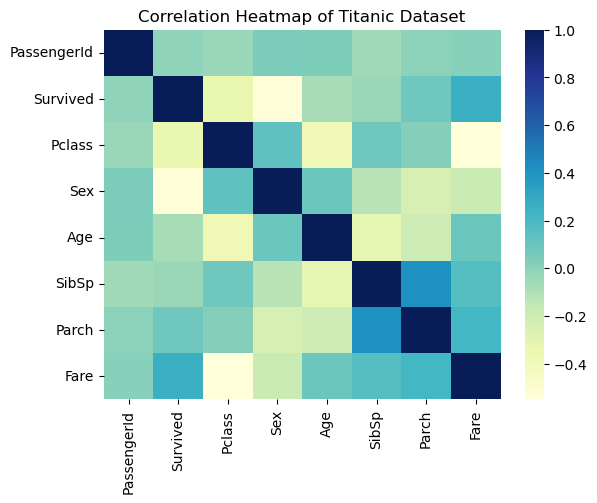

In [205]:
corr_titanic = df_titanic.corr(numeric_only=True)
sns.heatmap(corr_titanic, cmap="YlGnBu")
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [206]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
for train_indices, test_indices in split.split(df_titanic, df_titanic[["Survived", "Pclass", "Sex"]]):
    strat_train_set = df_titanic.loc[train_indices]
    strat_test_set = df_titanic.loc[test_indices]

In [207]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
739,740,0,3,"Nankoff, Mr. Minko",1,NaN,0,0,349218,7.8958,NaN,S
109,110,1,3,"Moran, Miss. Bertha",0,NaN,1,0,371110,24.1500,NaN,Q
788,789,1,3,"Dean, Master. Bertram Vere",1,1.0,1,2,C.A. 2315,20.5750,NaN,S
250,251,0,3,"Reed, Mr. James George",1,NaN,0,0,362316,7.2500,NaN,S
645,646,1,1,"Harper, Mr. Henry Sleeper",1,48.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",0,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S
87,88,0,3,"Slocovski, Mr. Selman Francis",1,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",1,46.0,1,0,W.E.P. 5734,61.1750,E31,S
832,833,0,3,"Saad, Mr. Amin",1,NaN,0,0,2671,7.2292,NaN,C


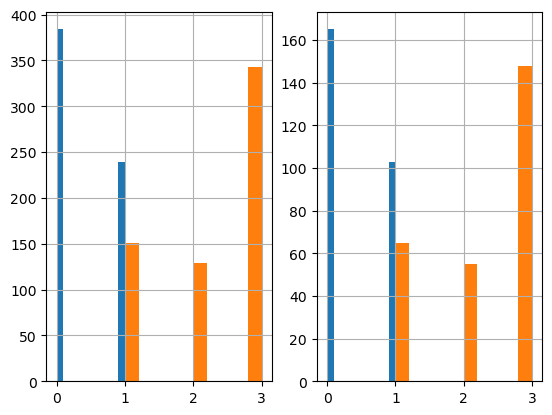

In [208]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [209]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): #pass X and y, y value is None always
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [210]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): # Fit method does not need to do anything for OneHotEncoder
        return self

    def transform(self, X):
        # Create an instance of OneHotEncoder
        encoder = OneHotEncoder()
        # Fit and transform the 'Embarked' column
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        cols = ["C","S","Q","N"]
        for i in range(len(matrix.T)):
            X[cols[i]] = matrix.T[i]

        column_names = ["Female", "Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            return X

In [211]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): # Fit method does not need to do anything for OneHotEncoder
        return self

    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")

In [212]:
pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureEncoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())
                    ])

In [213]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [214]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female
333,334,0,3,16.000000,2,0,18.0000,0.0,0.0,1.0,0.0
223,224,0,3,30.250503,0,0,7.8958,0.0,0.0,1.0,0.0
241,242,1,3,30.250503,1,0,15.5000,0.0,1.0,0.0,0.0
266,267,0,3,16.000000,4,1,39.6875,0.0,0.0,1.0,0.0
823,824,1,3,27.000000,0,1,12.4750,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
542,543,0,3,11.000000,4,2,31.2750,0.0,0.0,1.0,0.0
83,84,0,1,28.000000,0,0,47.1000,0.0,0.0,1.0,0.0
526,527,1,2,50.000000,0,0,10.5000,0.0,0.0,1.0,0.0
238,239,0,2,19.000000,0,0,10.5000,0.0,0.0,1.0,0.0


In [215]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 333 to 81
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Age          623 non-null    float64
 4   SibSp        623 non-null    int64  
 5   Parch        623 non-null    int64  
 6   Fare         623 non-null    float64
 7   C            623 non-null    float64
 8   S            623 non-null    float64
 9   Q            623 non-null    float64
 10  Female       623 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 58.4 KB


In [216]:
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']


scaler = StandardScaler()

X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [217]:
#Hyperparameter
#cdt = DecisionTreeClassifier()

#param_grid = [
   # {'max_depth': [None, 10, 20],
    #'min_samples_split': [2, 5, 10],
    #'criterion': ['gini', 'entropy']
    #}
#]

#grid_search = GridSearchCV(cdt, param_grid, cv=3, scoring="accuracy", return_train_score=True)
#grid_search.fit(X_data, y_data)

#print("Best Parameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

## The Decision Tree Classifier was not the best model since the best score or accuracy is 65%

In [218]:
#Hyperparameter
crf = RandomForestClassifier()

param_grid = [
    {'n_estimators': [5, 100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4]
    }
]

grid_search = GridSearchCV(crf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 500}
Best Score: 0.7367536851232503


In [219]:
final_crf = grid_search.best_estimator_

In [220]:
final_crf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=500)

In [221]:
#test on the strat_test_set
strat_test_set = pipeline.fit_transform(strat_test_set)

In [222]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']


scaler = StandardScaler()

X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [223]:
final_crf.score(X_data_test, y_data_test)

0.7052238805970149

In [224]:
final_data = pipeline.fit_transform(df_titanic)

In [225]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,1.0


In [226]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']


scaler = StandardScaler()

X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [227]:
final_crf = RandomForestClassifier()

param_grid = [
    {'n_estimators': [5, 100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4]
    }
]

grid_search = GridSearchCV(final_crf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 500}
Best Score: 0.7205387205387206


In [228]:
prod_final_crf = grid_search.best_estimator_

In [229]:
titanic_test_data = pd.read_csv("test.csv")

In [230]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [231]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0


In [232]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

/var/folders/yq/g7ds7x7d6wxb4_5nkp19f6dm0000gn/T/ipykernel_1719/1896703401.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method="ffill")


In [233]:
predictions = prod_final_crf.predict(X_data_final_test)

In [234]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [235]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv", index=False)

In [236]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
